In [7]:
%matplotlib inline
#%matplotlib widget

In [8]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [9]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

In [11]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack21_updated.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
all_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    #bot experiment loop
    FileName=row.linkingFileNamePack
    starting_frame=read_time(row.start_min)+10*25
    ending_frame=read_time(row.end_min)
    bot_num_current=row.bots
    data=pd.read_csv(passive_path+'\\'+FileName,index_col=0)
    relevant_data=data.iloc[starting_frame:ending_frame].reset_index()
    relevant_data['Filename']=[FileName]*len(relevant_data)
    relevant_data['diameter']=[row['passiveDiameter[cm]']]*len(relevant_data)
    relevant_data['BotType']=[row.bottype]*len(relevant_data)
    all_data=pd.concat([all_data,relevant_data],axis=0)
all_data.to_csv(passive_path+'\\all_linking_passive_data_21bots.csv')

updated_test_aligner_N021_D032_C0552.MP4_link.csv
                     0
lag time [s]          
4.00          0.215808
4.04          0.219502
4.08          0.223415
4.12          0.227407
4.16          0.231267
...                ...
19.84         3.924595
19.88         3.938966
19.92         3.953244
19.96         3.967452
20.00         3.981853

[401 rows x 1 columns]
[ 1.82001861 -4.06819039]
[0.00029846 0.00072741]


Text(0, 0.5, 'MSD $\\left[\\rm{cm}^2\\right]$')

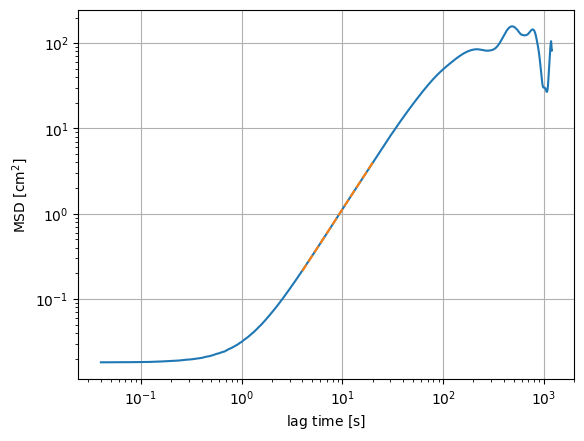

In [12]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2 #[cm/pixel]
expnum=34
exp_row=expSumPassive.iloc[expnum]
expnun_Filename=exp_row.linkingFileNamePack
print(expnun_Filename)
data=all_data[(all_data['Filename']==expnun_Filename)]
relevant_data_try = tp.filter_stubs(data,threshold=100)
max_lagtime=int(len(relevant_data_try)/3)
imsd_try = tp.imsd(relevant_data_try,fps=fps,mpp=mpp,max_lagtime=30000)
last_imsd_try=imsd_try.index[-1]
lag_time_thresh=int(last_imsd_try/150)
max_lagtime_thresh=int(last_imsd_try/3)
#relevant_imsd=imsd_try.loc[lag_time_thresh:max_lagtime_thresh]
relevant_imsd=imsd_try.loc[4:20]
print(relevant_imsd)
fig,ax = plt.subplots()
#ax.plot(np.log(imsd_try.index),np.log(imsd_try),label='msd')
ax.loglog(imsd_try.index,imsd_try,label='msd')
p0=np.array([2,0.5])
popt,pcov = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd.index),np.log(relevant_imsd.iloc[:,0]),p0=p0)
perr = np.sqrt(np.diag(pcov))
corr=np.corrcoef(pcov,rowvar=True)
print(popt)
print(perr)
fit_x=np.log(relevant_imsd.index)
fit_y=fit_x*popt[0]+popt[1]
ax.loglog(np.exp(fit_x),np.exp(fit_y),'--')
#ax.plot(df.frame,df.x)
#ax.plot(df.frame,df.y)
x = np.linspace(1,10,10)
y = 0.02E0*x**1.75
#ax.loglog(x,y,'--',label='1.75')
#ax.axis([0.01,2000,0.01,1E4])
ax.grid()

ax.set_xlabel(r'lag time $\left[\rm{s}\right]$')
ax.set_ylabel(r'MSD $\left[\rm{cm}^2\right]$')

fronter_N021_D032_C0503.MP4_link.csv
                      0
lag time [s]           
2.00           0.102664
2.04           0.105643
2.08           0.109440
2.12           0.112141
2.16           0.116829
...                 ...
49.84         17.169032
49.88         17.178252
49.92         17.187549
49.96         17.196659
50.00         17.205707

[1201 rows x 1 columns]
[ 1.62396027 -3.30738354]
[0.00323955 0.0101557 ]


Text(0, 0.5, 'MSD $\\left[\\rm{cm}^2\\right]$')

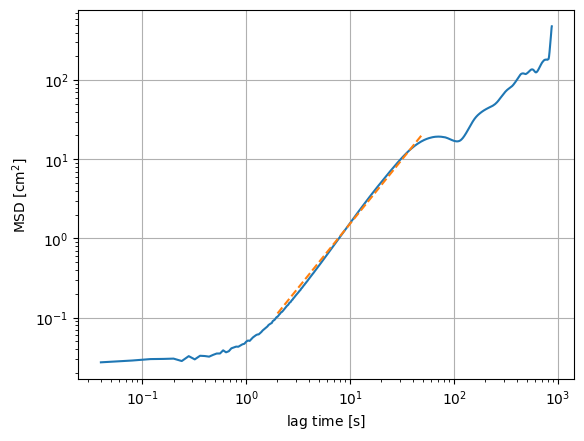

In [16]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2 #[cm/pixel]
expnum=41
exp_row=expSumPassive.iloc[expnum]
expnun_Filename=exp_row.linkingFileNamePack
print(expnun_Filename)
data=all_data[(all_data['Filename']==expnun_Filename)]
relevant_data_try = tp.filter_stubs(data,threshold=100)
max_lagtime=int(len(relevant_data_try)/3)
imsd_try = tp.imsd(relevant_data_try,fps=fps,mpp=mpp,max_lagtime=30000)
last_imsd_try=imsd_try.index[-1]
lag_time_thresh=int(last_imsd_try/150)
max_lagtime_thresh=int(last_imsd_try/3)
relevant_imsd=imsd_try.loc[2:50]
print(relevant_imsd)
#relevant_imsd=imsd_try.loc[4:20]
fig,ax = plt.subplots()
#ax.plot(np.log(imsd_try.index),np.log(imsd_try),label='msd')
ax.loglog(imsd_try.index,imsd_try,label='msd')
p0=np.array([2,0.5])
popt,pcov = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd.index),np.log(relevant_imsd.iloc[:,0]),p0=p0)
perr = np.sqrt(np.diag(pcov))
corr=np.corrcoef(pcov,rowvar=True)
print(popt)
print(perr)
fit_x=np.log(relevant_imsd.index)
fit_y=fit_x*popt[0]+popt[1]
ax.loglog(np.exp(fit_x),np.exp(fit_y),'--')
#ax.plot(df.frame,df.x)
#ax.plot(df.frame,df.y)
x = np.linspace(1,10,10)
y = 0.02E0*x**1.75
#ax.loglog(x,y,'--',label='1.75')
#ax.axis([0.01,2000,0.01,1E4])
ax.grid()

ax.set_xlabel(r'lag time $\left[\rm{s}\right]$')
ax.set_ylabel(r'MSD $\left[\rm{cm}^2\right]$')

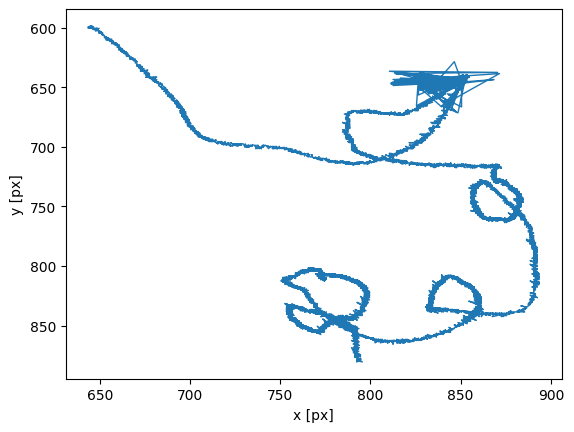

<AxesSubplot: xlabel='x [px]', ylabel='y [px]'>

In [17]:
tp.plot_traj(relevant_data_try)

In [27]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2 #[cm/pixel]
power_law=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    print(FileName)
    current_data=all_data[(all_data['Filename']==FileName)]
    relevant_data_try = tp.filter_stubs(current_data,threshold=1000)
    max_lagtime=int(len(relevant_data_try)/3)
    imsd = tp.imsd(relevant_data_try,fps=fps,mpp=mpp,max_lagtime=30000)
    #imsd = tp.imsd(current_data,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
    #last_imsd_try=imsd.index[-1]
    #lag_time_thresh=int(last_imsd_try/150)
    #max_lagtime_thresh=int(last_imsd_try/3)
    relevant_imsd_max=imsd.loc[7:50]
    #relevant_imsd_max=imsd.loc[lag_time_thresh:max_lagtime_thresh]
    relevant_imsd_min=imsd.loc[10:20]
    p0=np.array([2,0.5])
    popt_max,pcov_max = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd_max.index),np.log(relevant_imsd_max.iloc[:,0]),p0=p0)
    perr_max = np.sqrt(np.diag(pcov_max))
    corr_max=np.corrcoef(pcov_max,rowvar=True)
    popt_min,pcov_min = sc.optimize.curve_fit(linear_fit_log,np.log(relevant_imsd_min.index),np.log(relevant_imsd_min.iloc[:,0]),p0=p0)
    perr_min = np.sqrt(np.diag(pcov_min))
    corr_min=np.corrcoef(pcov_min,rowvar=True)
    data_row=pd.DataFrame()
    data_row['FileName']=[FileName]
    data_row['n_max']=[popt_max[0]]
    data_row['n_max_err']=[perr_max[0]]
    data_row['A_max']=[np.exp(popt_max[1])]
    data_row['A_max_err']=[perr_max[1]]
    data_row['n_min']=[popt_min[0]]
    data_row['n_min_err']=[perr_min[0]]
    data_row['A_min']=[np.exp(popt_min[1])]
    data_row['A_min_err']=[perr_min[1]]
    data_row['Bot_Type']=row.bottype
    data_row['diameter']=row['passiveDiameter[cm]']
    power_law=pd.concat([power_law,data_row],axis=0)
print(power_law)
power_law.to_csv(passive_path+'\\power_law_21_bots.csv')

aligner_N021_D007_C0548.MP4_link.csv
aligner_N021_D007_C0547.MP4_link.csv
aligner_N021_D007_C0544.MP4_link.csv
aligner_N021_D007_C0542.MP4_link.csv
fronter_N021_D007_C0541.MP4_link.csv
fronter_N021_D007_C0540.MP4_link.csv
fronter_N021_D007_C0539.MP4_link.csv
fronter_N021_D007_C0538.MP4_link.csv
fronter_N021_D012_C0537.MP4_link.csv
fronter_N021_D012_C0536.MP4_link.csv
fronter_N021_D012_C0535.MP4_link.csv
fronter_N021_D012_C0534.MP4_link.csv
fronter_N021_D012_C0533.MP4_link.csv
aligner_N021_D012_C0532.MP4_link.csv
aligner_N021_D012_C0531.MP4_link.csv
updated_test_aligner_N021_D012_C0530.MP4_link.csv
aligner_N021_D012_C0529.MP4_link.csv
updated_test_aligner_N021_D018_C0527.MP4_link.csv
aligner_N021_D018_C0526.MP4_link.csv
aligner_N021_D018_C0525.MP4_link.csv
aligner_N021_D018_C0523.MP4_link.csv
fronter_N021_D018_C0521.MP4_link.csv
fronter_N021_D018_C0519.MP4_link.csv
fronter_N021_D018_C0514.MP4_link.csv
fronter_N021_D018_C0516.MP4_link.csv
fronter_N021_D018_C0517.MP4_link.csv
fronter_N021

In [25]:
mean_data=power_law.groupby(by=["Bot_Type","diameter"]).mean()
print(mean_data.loc[("fronter","n_min")])
std_data=power_law.groupby(by=["Bot_Type","diameter"]).std()
count_data=power_law.groupby(by=["Bot_Type","diameter"]).count()
print(count_data)
print(power_law.set_index(["Bot_Type","diameter"]).loc[("fronter","n_min")])
print(power_law.set_index(["Bot_Type","diameter"]).loc[("aligner","n_min")])

diameter
7     1.331725
12    1.676499
18    1.716732
28    1.772172
32    1.830717
Name: n_min, dtype: float64
                   FileName  n_max  n_max_err  A_max  A_max_err  n_min  \
Bot_Type diameter                                                        
aligner  7                4      4          4      4          4      4   
         12               4      4          4      4          4      4   
         18               4      4          4      4          4      4   
         28               4      4          4      4          4      4   
         32               4      4          4      4          4      4   
fronter  7                4      4          4      4          4      4   
         12               5      5          5      5          5      5   
         18               5      5          5      5          5      5   
         28               4      4          4      4          4      4   
         32               4      4          4      4          4      4   


C:\Users\User\AppData\Local\Temp\ipykernel_21652\3897974523.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data=power_law.groupby(by=["Bot_Type","diameter"]).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_21652\3897974523.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_data=power_law.groupby(by=["Bot_Type","diameter"]).std()
C:\Users\User\AppData\Local\Temp\ipykernel_21652\3897974523.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(power_law.set_index(["Bot_Type","diameter"]).loc[("fronter","n_min")])
C:\Users\User\AppData\Local\Temp\ipykernel_21652\3

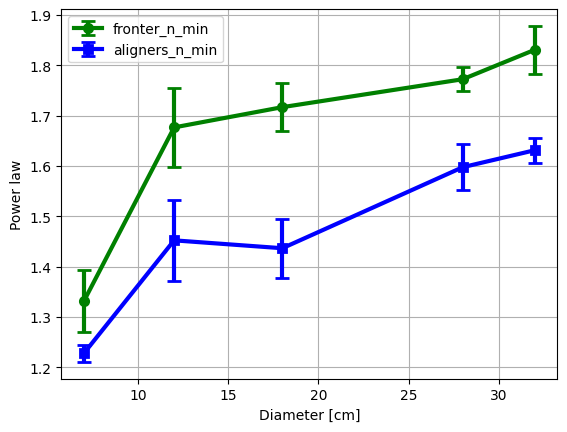

In [28]:
fronter_data=mean_data.loc[("fronter","n_min")]
fronter_data_max= mean_data.loc[("fronter","n_max")]
fronter_diff=fronter_data-fronter_data_max
fronter_count=count_data.loc[("fronter","FileName")]
aligner_data=mean_data.loc[("aligner","n_min")]
aligner_data_max=mean_data.loc[("aligner","n_max")]
aligner_diff=aligner_data-aligner_data_max
aligner_count=count_data.loc[("aligner","FileName")]

fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data,label='fronter_n_min',yerr=np.abs(fronter_diff.to_numpy())/np.sqrt(fronter_count),marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_data,label='aligners_n_min',yerr=np.abs(aligner_diff.to_numpy())/np.sqrt(aligner_count),marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('Power law')
ax.grid()
ax.legend()
saved_data=pd.DataFrame(data={'fronter_data': fronter_data
                              ,'fronter_data_max': fronter_data_max,'fronter_diff':fronter_diff,'aligner_data':aligner_data
                              ,'aligner_data_max':aligner_data_max,'aligner_diff':aligner_diff})
saved_data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\powerlaw_vs_diameter_21bots.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\powerlaw_vs_diameter_21bots.png',bbox_inches='tight')

### Save results as a CSV for plotting in production

In [44]:
powerLaws = pd.DataFrame({'bot':[],'diameter [cm]':[], 'power law':[],'power law Err': []})

x=fronter_data.index.values
y=fronter_data.values
yErr=np.abs(fronter_diff.values)/2

powerLaws = pd.concat([powerLaws, pd.DataFrame({'bot':['fronter']*len(x),'diameter [cm]':x, 'power law':y, 'power law Err': yErr})],ignore_index=True)

x=aligner_data.index.values
y=aligner_data.values
yErr=np.abs(aligner_diff.values)/2
                      
powerLaws = pd.concat([powerLaws, pd.DataFrame({'bot':['aligner']*len(x),'diameter [cm]':x, 'power law':y, 'power law Err': yErr})],ignore_index=True)

In [45]:
powerLaws.to_csv('powerLawsN21bots.csv')